In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


In [2]:
# development_dataframe = pd.read_csv("/kaggle/input/health-insurance-cross-sell-prediction/train.csv")

development_dataframe = pd.read_csv("./input/train.csv")

# EDA

In [3]:
development_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
development_dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_df, val_df = train_test_split(development_dataframe, test_size=0.2, random_state=42, stratify=development_dataframe["Response"])

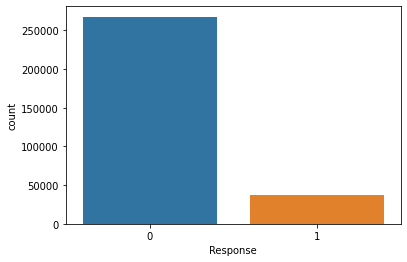

In [6]:
sns.countplot(x="Response", data=train_df)
plt.show()

### Does the gender impact on the upseling?

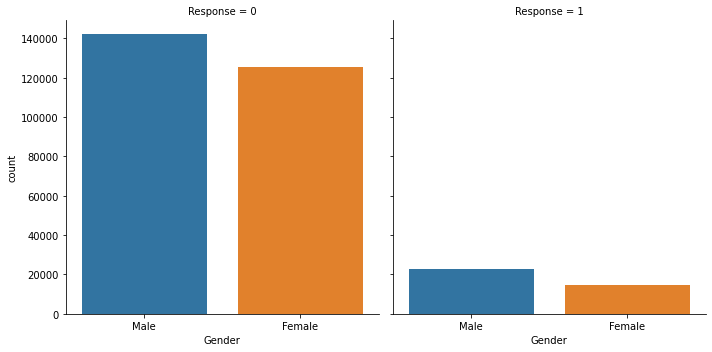

In [7]:
sns.catplot(x="Gender", col="Response", data=train_df, kind="count")
plt.show()

### Insurance predicts upseling?

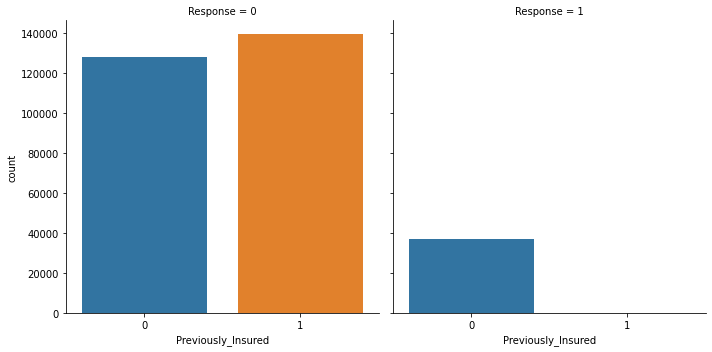

In [8]:
sns.catplot(x="Previously_Insured", col="Response", data=train_df, kind="count")
plt.show()

### Understand the impact of vehicle age

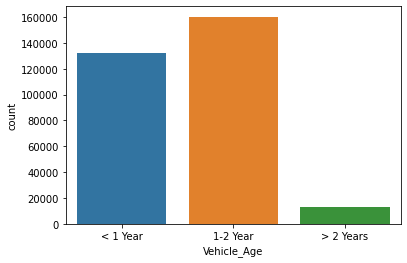

In [9]:
sns.countplot(x="Vehicle_Age", data=train_df)
plt.show()

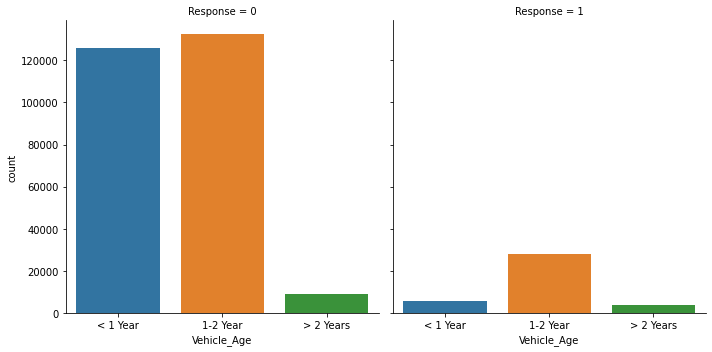

In [10]:
sns.catplot(x="Vehicle_Age", col="Response", data=train_df, kind="count")
plt.show()

### Understand the impact of vehicle damage on upseling

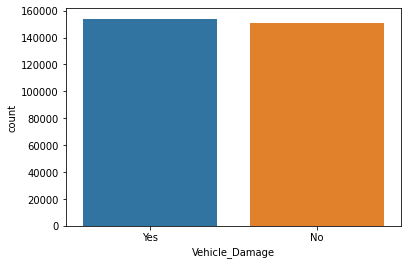

In [11]:
sns.countplot(x="Vehicle_Damage", data=train_df)
plt.show()

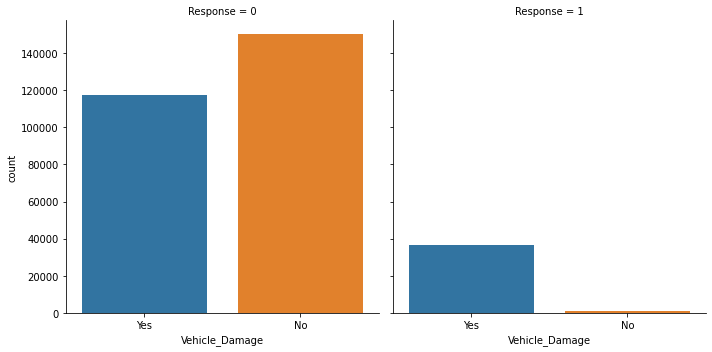

In [12]:
sns.catplot(x="Vehicle_Damage", col="Response", data=train_df, kind="count")
plt.show()

### Driving license

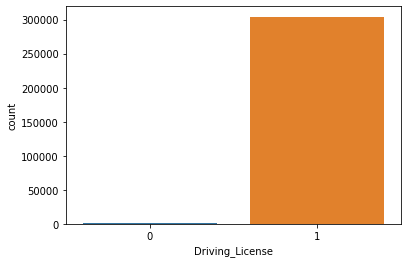

1    0.997855
0    0.002145
Name: Driving_License, dtype: float64

In [41]:
sns.countplot(x="Driving_License", data=train_df)
plt.show()

train_df["Driving_License"].value_counts(normalize=True)

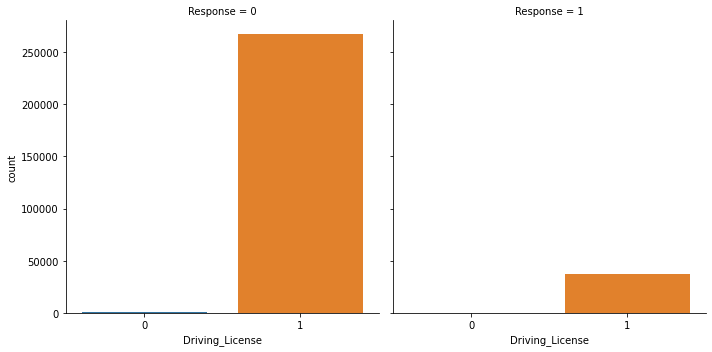

Driving_License  Response
0                0           0.948012
                 1           0.051988
1                0           0.877285
                 1           0.122715
Name: Response, dtype: float64

In [45]:
sns.catplot(x="Driving_License", col="Response", data=train_df, kind="count")
plt.show()

train_df.groupby("Driving_License")["Response"].value_counts(normalize=True)

### Check if premium impacts on upseling

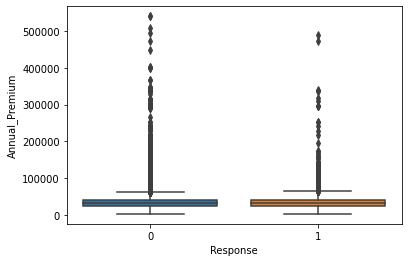

In [13]:
sns.boxplot(x="Response", y="Annual_Premium", data=train_df)
plt.show()

In [14]:
### TODO: Perform hipotesis testing on the relation between response and annual premium

### Age impact

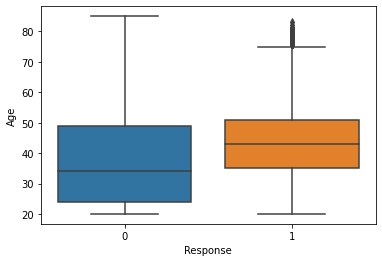

In [15]:
sns.boxplot(x="Response", y="Age", data=train_df)
plt.show()

In [17]:
### TODO: Test if the distributions are equal

### Policy sales channel

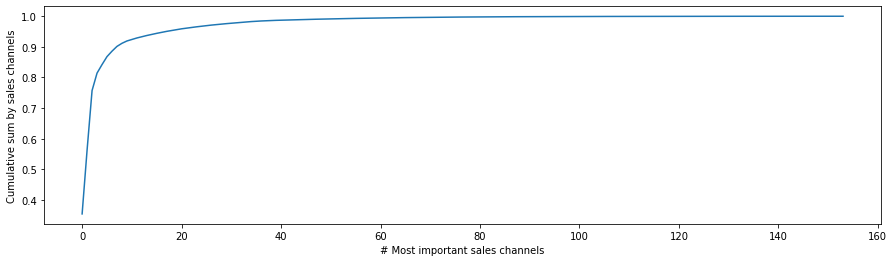

In [36]:
relative_count_most_important = train_df["Policy_Sales_Channel"].value_counts(normalize=True)

cumulative_sales_channels = np.cumsum(relative_count_most_important)
index = np.arange(len(cumulative_sales_channels))

fig, ax = plt.subplots(figsize=(15, 4))

sns.lineplot(x=index, y=cumulative_sales_channels, ax=ax)

ax.set_xlabel("# Most important sales channels")
ax.set_ylabel("Cumulative sum by sales channels")

plt.show()

### Analyse vintage

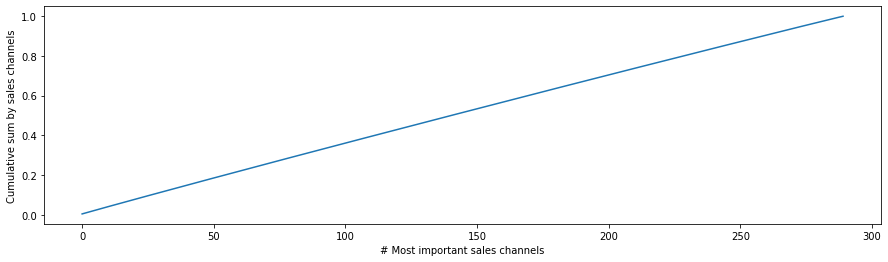

In [37]:
relative_count_most_important = train_df["Vintage"].value_counts(normalize=True)

cumulative_sales_channels = np.cumsum(relative_count_most_important)
index = np.arange(len(cumulative_sales_channels))

fig, ax = plt.subplots(figsize=(15, 4))

sns.lineplot(x=index, y=cumulative_sales_channels, ax=ax)

ax.set_xlabel("# Most important vintage")
ax.set_ylabel("Cumulative sum by vintage")

plt.show()

In [38]:
### TODO: Check independece of vintage with response variable

# Start model training

In [7]:
y_train = train_df["Response"].values
X_train = train_df.drop(columns=["Response", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel", "Gender"])

In [8]:
svc = LinearSVC()

svc.fit(X_train, y_train)

/home/felipe/.local/share/virtualenvs/upsell_prediction-RpQjRpa1/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()